### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 패션 MNIST 데이터

데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

##### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
train_scaled = train_input / 255.0

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성함수

In [13]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeMaodel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [14]:
# 함수 사용 예시
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeMaodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [15]:
model = model_fn()
model.summary()

Model: "model_fn_MakeMaodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5377 - accuracy: 0.8121 - 2s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.4014 - accuracy: 0.8575 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3617 - accuracy: 0.8716 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3414 - accuracy: 0.8784 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3247 - accuracy: 0.8842 - 2s/epoch - 1ms/step


In [17]:
history.history

{'loss': [0.5377330780029297,
  0.4013744294643402,
  0.3617279529571533,
  0.3413761854171753,
  0.3247210383415222],
 'accuracy': [0.8121041655540466,
  0.8575208187103271,
  0.8716041445732117,
  0.8783749938011169,
  0.8842083215713501]}

#### 손실곡선 차트

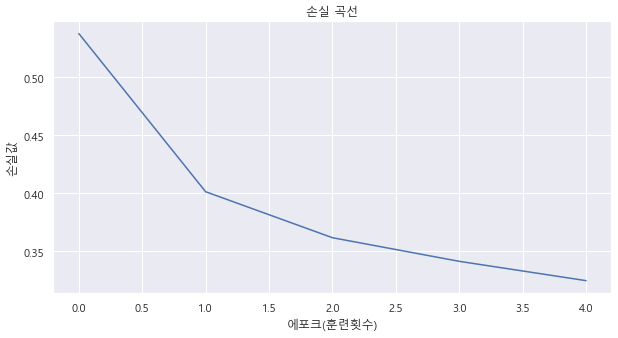

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

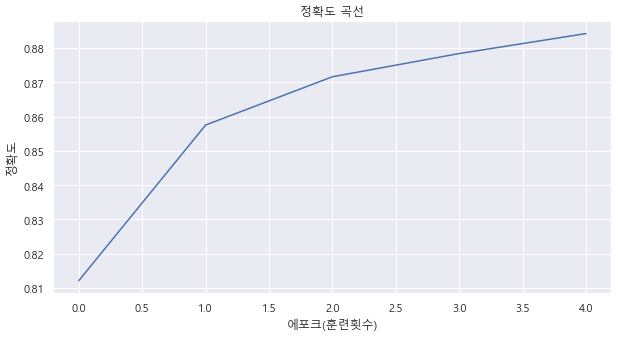

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번 훈련

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5221 - accuracy: 0.8135
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3892 - accuracy: 0.8605
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3534 - accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3316 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3178 - accuracy: 0.8882
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3086 - accuracy: 0.8915
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2998 - accuracy: 0.8944
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8971
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.8997
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.277

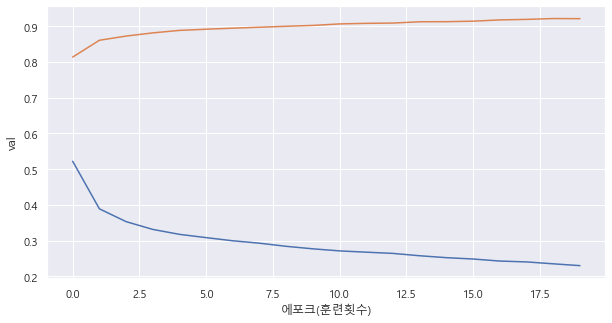

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 >> 정확도 92%

In [24]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target)) # 검증데이터 추가

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5340 - accuracy: 0.8126 - val_loss: 0.4245 - val_accuracy: 0.8447
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3955 - accuracy: 0.8583 - val_loss: 0.3876 - val_accuracy: 0.8630
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3596 - accuracy: 0.8713 - val_loss: 0.3704 - val_accuracy: 0.8719
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8792 - val_loss: 0.3579 - val_accuracy: 0.8771
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3217 - accuracy: 0.8842 - val_loss: 0.3663 - val_accuracy: 0.8802
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.8893 - val_loss: 0.3868 - val_accuracy: 0.8723
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8932 - val_loss: 0.3861 - val_accuracy:

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트 / 검증세트 비교

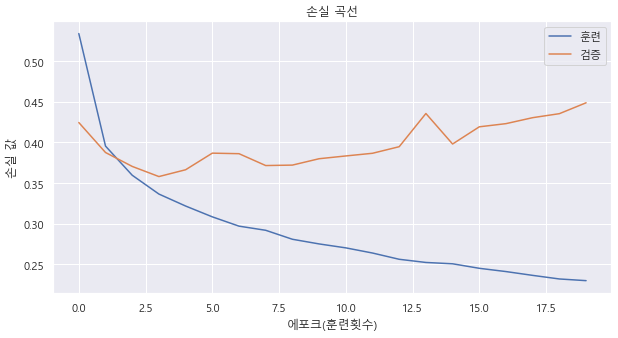

In [27]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실 값')
plt.legend(['훈련','검증'])
plt.show()

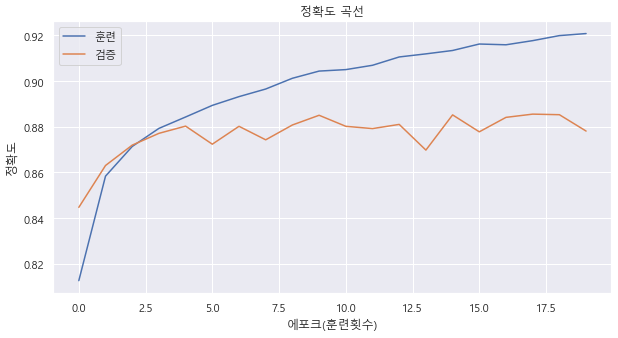

In [28]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('정확도 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭다운

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeMaodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target)) # 검증데이터 추가

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.7958 - val_loss: 0.4423 - val_accuracy: 0.8383
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4443 - accuracy: 0.8437 - val_loss: 0.4214 - val_accuracy: 0.8468
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4187 - accuracy: 0.8559 - val_loss: 0.4064 - val_accuracy: 0.8627
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4067 - accuracy: 0.8606 - val_loss: 0.3873 - val_accuracy: 0.8689
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8650 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3912 - accuracy: 0.8674 - val_loss: 0.3816 - val_accuracy: 0.8708
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8693 - val_loss: 0.3749 - val_accuracy:

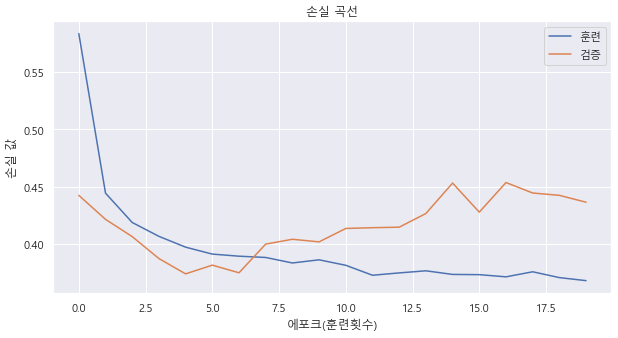

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실 값')
plt.legend(['훈련','검증'])
plt.show()

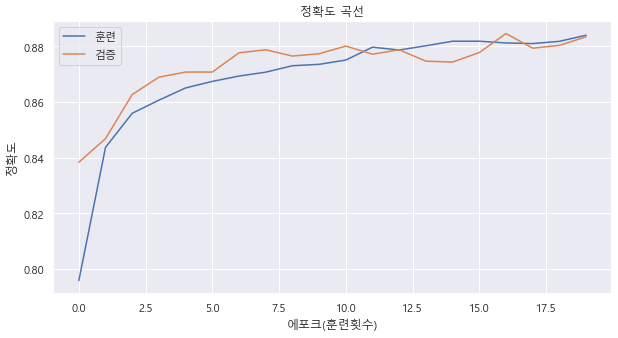

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('정확도 곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.legend(['훈련','검증'])
plt.show()

In [33]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target)) # 검증데이터 추가

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8746 - val_loss: 0.4043 - val_accuracy: 0.8713
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3446 - accuracy: 0.8768 - val_loss: 0.3993 - val_accuracy: 0.8684
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3381 - accuracy: 0.8801 - val_loss: 0.3872 - val_accuracy: 0.8737
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3233 - accuracy: 0.8818 - val_loss: 0.3822 - val_accuracy: 0.8778
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3210 - accuracy: 0.8829 - val_loss: 0.3799 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3112 - accuracy: 0.8859 - val_loss: 0.3649 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.8884 - val_loss: 0.3646 - val_accuracy:

#### 모델 로드 / 저장

In [34]:
model.summary()

Model: "model_fn_MakeMaodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 훈련된 가중치 저장
model.save_weights('./data/model-weights.h5')

In [36]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

#### 가중치 모델 로드

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [43]:
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

가중치만 불러와서 오류 발생 !!!

#### 전체모델 다시 로드

In [45]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3638 - accuracy: 0.8845


[0.3638105094432831, 0.8845000267028809]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장하면 모든 기능을 수행가능

In [46]:
model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


array([[3.3570962e-27, 0.0000000e+00, 1.9914882e-35, ..., 4.6250083e-24,
        1.0000000e+00, 7.5457892e-35],
       [6.5742525e-20, 0.0000000e+00, 1.7115591e-27, ..., 1.7053398e-29,
        1.0000000e+00, 1.9435515e-29],
       [3.4490034e-25, 1.1192418e-23, 1.0729922e-27, ..., 9.9999607e-01,
        1.4962706e-17, 7.5912228e-15],
       ...,
       [1.6187124e-10, 1.3131306e-32, 1.0991532e-14, ..., 1.6666896e-19,
        1.0000000e+00, 2.3953682e-19],
       [3.6809127e-13, 0.0000000e+00, 2.0076799e-22, ..., 1.3689505e-31,
        1.0000000e+00, 3.4954444e-31],
       [1.9667490e-01, 2.1428340e-11, 7.3403453e-07, ..., 4.3500688e-05,
        5.9330009e-06, 7.1222675e-01]], dtype=float32)

In [47]:
### 예측 결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8845

In [48]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백 Callback

In [51]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5956 - accuracy: 0.7885 - val_loss: 0.4261 - val_accuracy: 0.8463
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8415 - val_loss: 0.3941 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4070 - accuracy: 0.8516 - val_loss: 0.3698 - val_accuracy: 0.8669
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3861 - accuracy: 0.8590 - val_loss: 0.3621 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3667 - accuracy: 0.8645 - val_loss: 0.3505 - val_accuracy: 0.8739
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8692 - val_loss: 0.3471 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3470 - accuracy: 0.8729 - val_loss: 0.3453 - val_accuracy:

In [52]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8834


[0.326630562543869, 0.8834166526794434]

#### 조기종료

In [62]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True >> 가장 좋은 모델 저장됨
# verbose=1 >> 값을 확인 할 수 있음
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1474/1500 [============================>.] - ETA: 0s - loss: 0.6045 - accuracy: 0.7862
Epoch 1: val_loss improved from inf to 0.43610, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6020 - accuracy: 0.7871 - val_loss: 0.4361 - val_accuracy: 0.8432
Epoch 2/20
1486/1500 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.8399
Epoch 2: val_loss improved from 0.43610 to 0.38045, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4456 - accuracy: 0.8399 - val_loss: 0.3805 - val_accuracy: 0.8636
Epoch 3/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8523
Epoch 3: val_loss did not improve from 0.38045
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4051 - accuracy: 0.8524 - val_loss: 0.3844 - val_accuracy: 0.8582
Epoch 4/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.3830 - acc

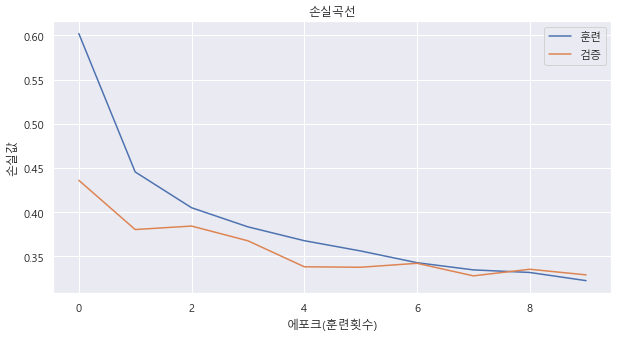

In [63]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [64]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch

9

In [65]:
model.evaluate(val_scaled, val_target) # 8번째 값

375/375 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8801


[0.328098326921463, 0.8800833225250244]

In [66]:
# 최종값 저장
model.save('./data/best_model_epoch9.h5')

### 조기종료된 모델 저장 값 / 체크포인트로 저장된 모델 값 비교

In [67]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3281 - accuracy: 0.8801


[0.328098326921463, 0.8800833225250244]

In [68]:
model_9 = keras.models.load_model('./data/best_model_epoch9.h5')
model_9.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3281 - accuracy: 0.8801


[0.328098326921463, 0.8800833225250244]

In [69]:
val_labels = np.argmax( model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8800833333333333

In [73]:
### 예측결과
val_labels[:6]

array([8, 8, 7, 4, 8, 4], dtype=int64)